In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Goal
- Reducing the complexity of your model
- Minimizing the resources required for training and inference

In [2]:
headers = ['id','diagnosis',
           'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
           'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
            'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
            'concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
            'perimeter_worst','area_worst' ,'smoothness_worst','compactness_worst' ,'concavity_worst','concave_points_worst',
            'symmetry_worst','fractal_dimension_worst'
        ]

In [3]:
df = pd.read_csv('./data/wdbc.data', names=headers)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Remove id columns
columns_to_remove = ['id']
df.drop(columns_to_remove, axis=1, inplace=True)

In [6]:
# Integer Encode the target variable, diagnosis
df["diagnosis_int"] = (df["diagnosis"] == 'M').astype('int')

df.drop(['diagnosis'], axis=1, inplace=True)

In [7]:
# Split feature and target vectors
X = df.drop("diagnosis_int", axis=1)
Y = df["diagnosis_int"]

In [8]:
def fit_model(X, Y):
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    model.fit(X, Y)
    return model

In [9]:
def calculate_metrics(model, X_test_scaled, Y_test):    
    y_predict_r = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_predict_r)
    roc = roc_auc_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    return acc, roc, prec, rec, f1

In [10]:
def train_and_get_metrics(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = fit_model(X_train_scaled, Y_train)
    acc, roc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)
    return acc, roc, prec, rec, f1

In [11]:
def evaluate_model_on_features(X, Y):
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    return display_df

In [12]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.97619,0.953488,30


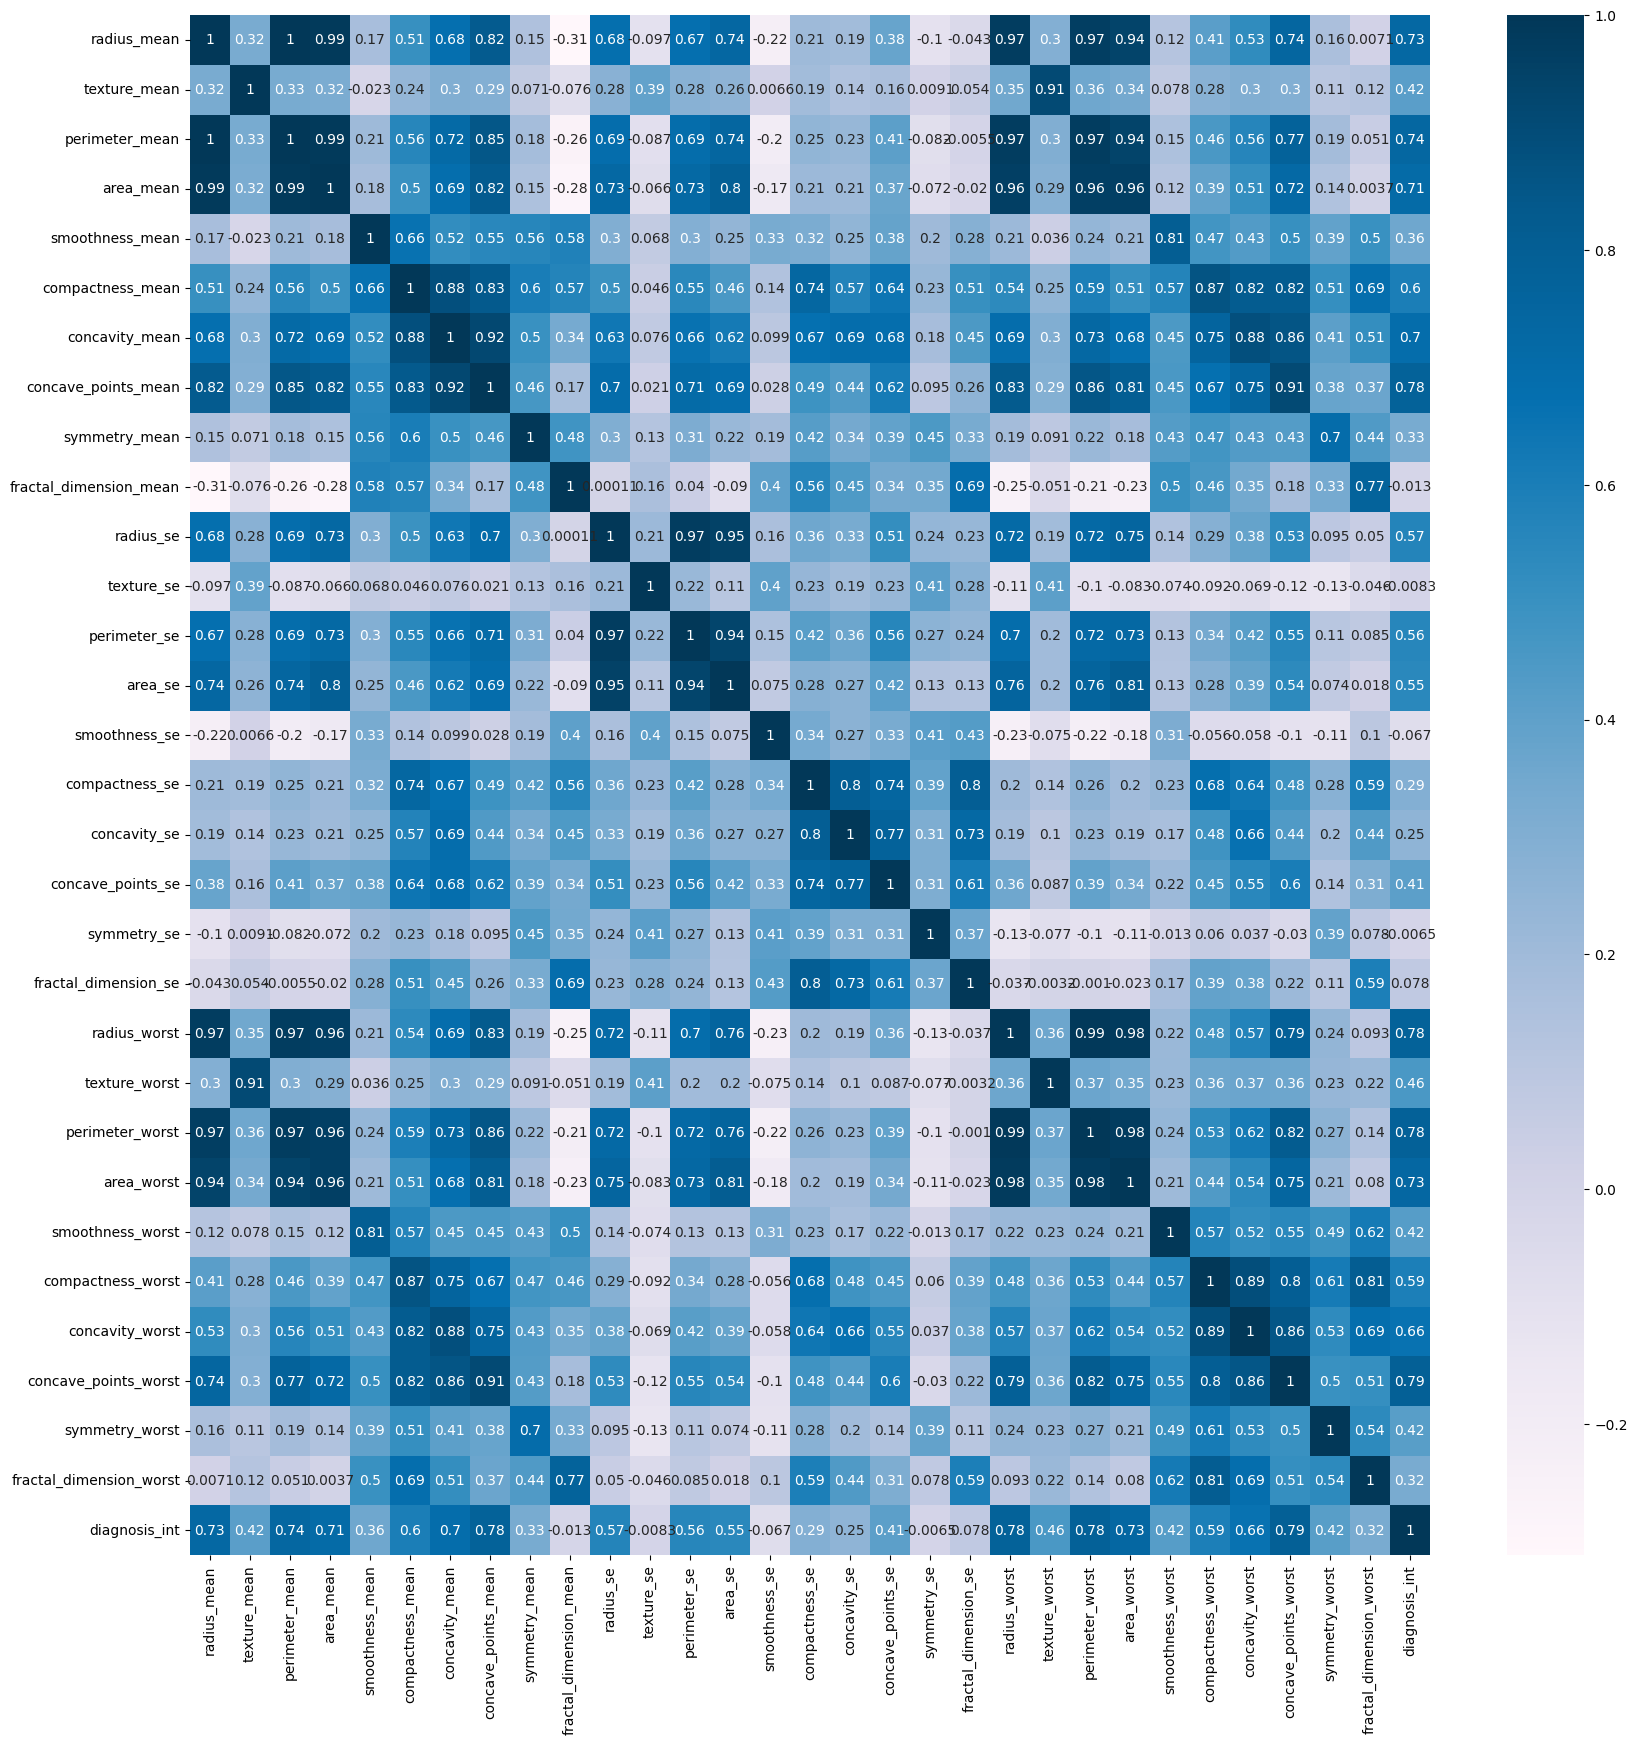

In [13]:
plt.figure(figsize=(20,20))
cor = df.corr() 
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

##### Filter Methods
- This type of feature selection uses statistical methods to rank a given set of features
- It does this ranking regardless of the model you will be training on (i.e. you only need the feature values)
- When using these, it is important to note the types of features and target variable you have

* Pearson Correlation (numeric features - numeric target, *exception: when target is 0/1 coded*)
* ANOVA f-test (numeric features - categorical target)
* Chi-squared (categorical features - categorical target)

In [14]:
cor_target = abs(cor["diagnosis_int"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.items()]
names.remove('diagnosis_int')
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [15]:
strong_features_eval_df = evaluate_model_on_features(df[names], Y)
strong_features_eval_df.index = ['Strong features']

results = pd.concat([results, strong_features_eval_df], axis=0)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.97619,0.953488,30
Strong features,0.973684,0.974206,0.953488,0.97619,0.964706,25


##### Remove features that are highly correlated

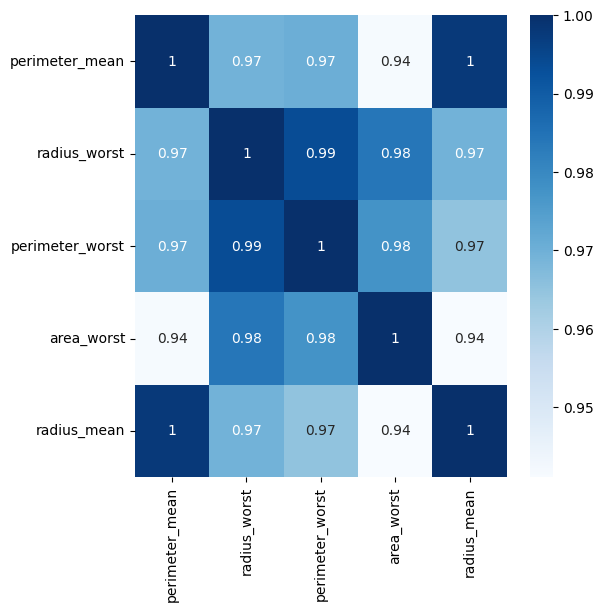

In [16]:
# From manual inspection
# Set figure size
plt.figure(figsize=(6,6))

# Select a subset of features
new_corr = df[['perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'radius_mean']].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [17]:
# Remove the features with high correlation to other features
subset_feature_corr_names = [x for x in names if x not in ['radius_worst', 'perimeter_worst', 'area_worst']]

# Calculate and check evaluation metrics
subset_feature_eval_df = evaluate_model_on_features(df[subset_feature_corr_names], Y)
subset_feature_eval_df.index = ['Subset features']

# Append to results and display
results = pd.concat([results, subset_feature_eval_df], axis=0)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.97619,0.953488,30
Strong features,0.973684,0.974206,0.953488,0.97619,0.964706,25
Subset features,0.973684,0.974206,0.953488,0.97619,0.964706,22


#### Univariate Selection
- A statistical test and it can be used to select those features that have the strongest relationship with the target variable
- Compute Anova F-values to slect top K best features
- F-value indicates whether there are significant differences in means between two or more groups
- It's based on the ratio of two variances: the variance between groups (the mean of each group to the overall mean of the entire dataset)and the variance within groups (how much individual data points deviate from their respective group means)
- F-value is calculated as the ratio of the variance between groups to the variance within groups, normalized by their respective degrees of freedom
- We can use the F-distribution table or statistical software to find the p-value associated with this F-value. If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that there are significant differences in the mean test scores between the groups.

In [21]:
def univariate_selection():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=20)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
    for name, included in zip(df.drop("diagnosis_int", axis=1 ).columns, feature_idx):
        print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = df.drop("diagnosis_int",axis=1 ).columns[feature_idx]
    
    return feature_names

In [25]:
# Testing on anova
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
f_values, p_values = f_classif(X_train, Y_train)
f_values

array([4.96862895e+02, 1.16571181e+02, 5.37787981e+02, 4.31029772e+02,
       6.04665483e+01, 2.63320549e+02, 4.50392461e+02, 6.48842717e+02,
       5.75911428e+01, 2.31167964e-02, 1.99307612e+02, 3.85906852e-02,
       1.92959065e+02, 1.79037314e+02, 2.05066640e+00, 4.89330856e+01,
       4.31014873e+01, 8.92355215e+01, 4.74175489e-03, 3.04398246e+00,
       6.61383341e+02, 1.37191043e+02, 6.97341217e+02, 5.05118083e+02,
       9.64230591e+01, 2.81153647e+02, 4.34662849e+02, 8.07468270e+02,
       1.04153860e+02, 6.52412692e+01])

In [22]:
univariate_feature_names = univariate_selection()

radius_mean: True
texture_mean: True
perimeter_mean: True
area_mean: True
smoothness_mean: False
compactness_mean: True
concavity_mean: True
concave_points_mean: True
symmetry_mean: False
fractal_dimension_mean: False
radius_se: True
texture_se: False
perimeter_se: True
area_se: True
smoothness_se: False
compactness_se: False
concavity_se: False
concave_points_se: True
symmetry_se: False
fractal_dimension_se: False
radius_worst: True
texture_worst: True
perimeter_worst: True
area_worst: True
smoothness_worst: True
compactness_worst: True
concavity_worst: True
concave_points_worst: True
symmetry_worst: True
fractal_dimension_worst: False


In [27]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = pd.concat([results, univariate_eval_df], axis=0)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.97619,0.953488,30
Strong features,0.973684,0.974206,0.953488,0.97619,0.964706,25
Subset features,0.973684,0.974206,0.953488,0.97619,0.964706,22
F-test,0.973684,0.974206,0.953488,0.97619,0.964706,20


#### Wrapper Methods
- Wrapper methods use a model to measure the effectiveness of a particular subset of features. As mentioned in class, one approach is to remove or add features sequentially. You can either start with 1 feature and gradually add until no improvement is made (forward selection), or do the reverse (backward selection). That can be done with the [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector) class which uses k-fold cross validation scores to decide which features to add or remove. [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) is similar to backwards elimination but uses feature importance scores to prune the number of features. You can also specify how many features to remove at each iteration of the recursion. Let's use this as the wrapper for our model below.


##### Recursive Feature Elimination
- Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [33]:
def run_rfe():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(estimator=model, n_features_to_select=20)
    
    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = df.drop("diagnosis_int", axis=1 ).columns[rfe.get_support()]
    
    return feature_names

In [34]:
rfe_feature_names = run_rfe()

In [35]:
rfe_feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'perimeter_se', 'area_se', 'concavity_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
rfe_eval_df = evaluate_model_on_features(df[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = pd.concat([results, rfe_eval_df], axis=0)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.97619,0.953488,30
Strong features,0.973684,0.974206,0.953488,0.97619,0.964706,25
Subset features,0.973684,0.974206,0.953488,0.97619,0.964706,22
F-test,0.973684,0.974206,0.953488,0.97619,0.964706,20
RFE,0.964912,0.967262,0.931818,0.97619,0.953488,20


#### Embedded Methods

- Some models already have intrinsic properties that select the best features when it is constructed
- With that, we can simply access these properties to get the scores for each feature

In [38]:
def feature_importances_from_tree_based_model_():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # Define the model to use
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier()
    model = model.fit(X_train_scaled,Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=False).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = df.drop("diagnosis_int", axis=1 ).columns[feature_idx]
        
    return feature_names

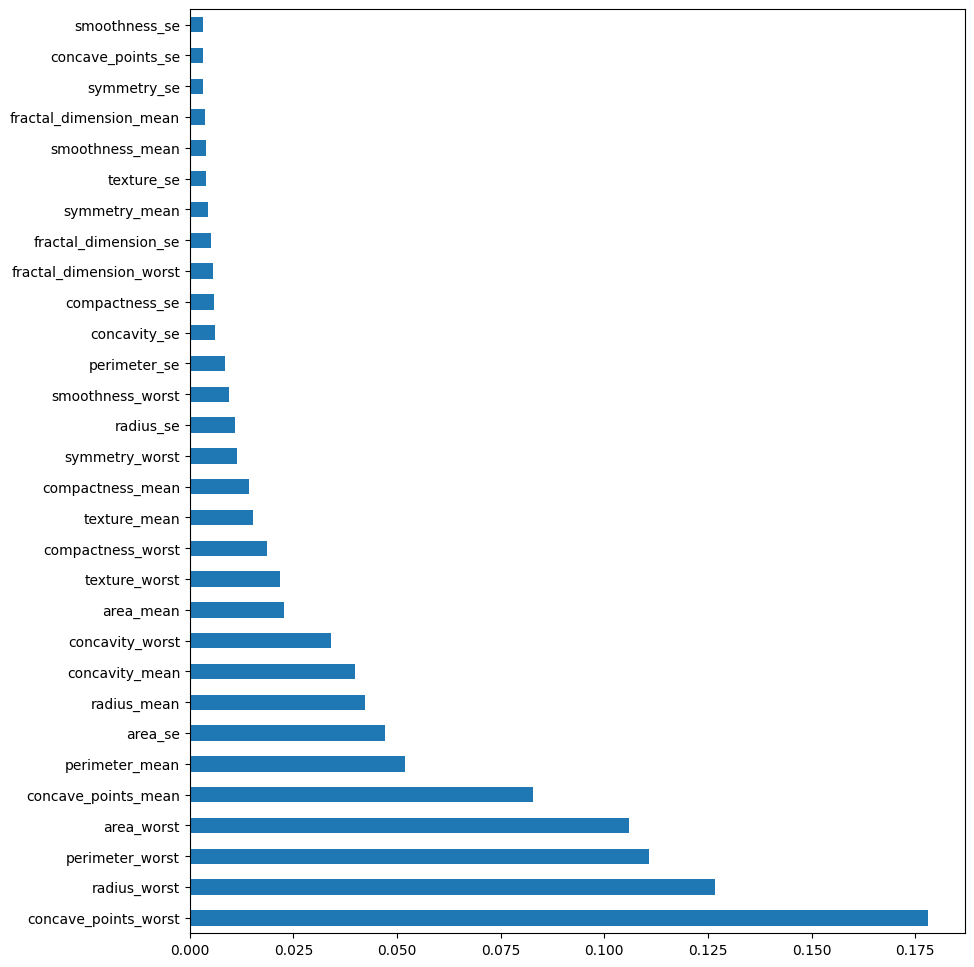

In [39]:
model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)

In [40]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(df[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = pd.concat([results, feat_imp_eval_df], axis=0)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.97619,0.953488,30
Strong features,0.973684,0.974206,0.953488,0.97619,0.964706,25
Subset features,0.973684,0.974206,0.953488,0.97619,0.964706,22
F-test,0.973684,0.974206,0.953488,0.97619,0.964706,20
RFE,0.964912,0.967262,0.931818,0.97619,0.953488,20
Feature Importance,0.964912,0.967262,0.931818,0.97619,0.953488,15


#### L1 Regularization

In [42]:
def run_l1_regularization():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train_scaled, Y_train)

    feature_names = df.drop("diagnosis_int", axis=1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()

In [43]:
l1reg_eval_df = evaluate_model_on_features(df[l1reg_feature_names], Y)
l1reg_eval_df.index = ['L1 Reg']

# Append to results and display
results = pd.concat([results, l1reg_eval_df], axis=0)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.964912,0.967262,0.931818,0.976190,0.953488,30
Strong features,0.973684,0.974206,0.953488,0.976190,0.964706,25
Subset features,0.973684,0.974206,0.953488,0.976190,0.964706,22
F-test,0.973684,0.974206,0.953488,0.976190,0.964706,20
RFE,0.964912,0.967262,0.931818,0.976190,0.953488,20
Feature Importance,0.964912,0.967262,0.931818,0.976190,0.953488,15
L1 Reg,0.929825,0.929563,0.886364,0.928571,0.906977,18
